# Асинхронное программирование, потоки и параллелизм в Python.

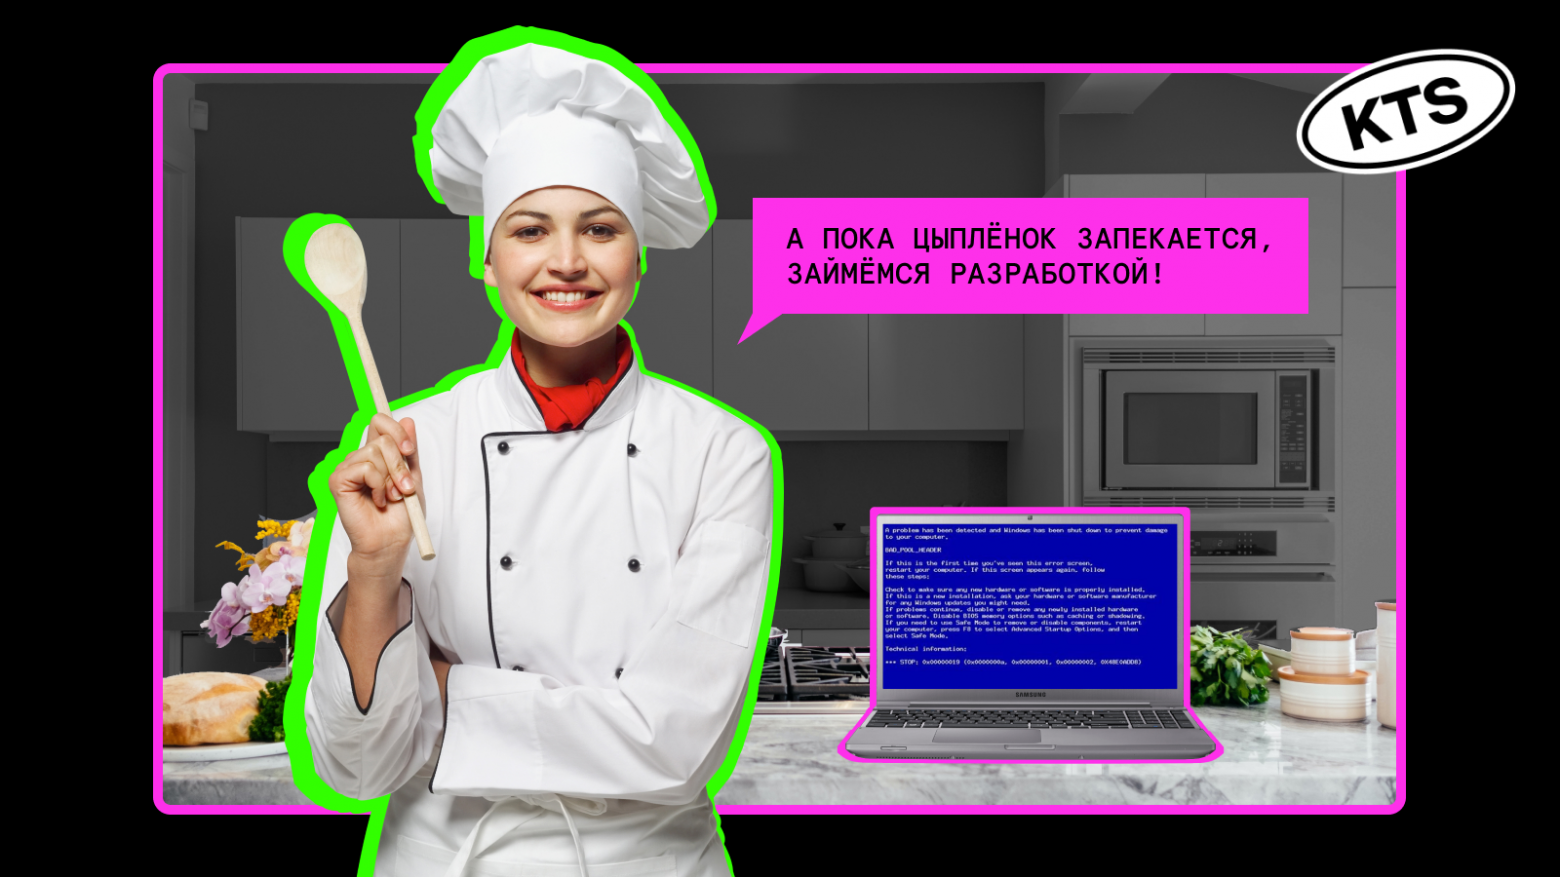

### Маша и Даша хотели пойти в ресторан. Но они не могли опеределиться, куда им пойти. В итоге они посмотрели мастер-класс от Юли Высоцкой и решили сделать сырники наперегонки!

In [8]:
from IPython.display import HTML
HTML("""
    <video alt="test" controls autoplay width=80%>
        <source src="syrnichki.mp4" type="video/mp4">
    </video>
""")

### Но вот незадача - у девочек нет игридиентов. Так как в их районе нет достатвки продуктов, они пошли в Ашан. Маша любит делать все параллельно и быстро, а Даша же любит строгий порядок в своих делах. Так и случилось в Ашане.
#### Игридиенты:
- **Творог**
- **Сахар**
- **Яйца**
- **Мука**
- Также наши девочки захотели к сырникам добавить **свежеперемолотые ягоды с сахаром**
### Маша пошла в молочный отдел и попросила взвесить ей творога. Ей сказали подождать **5 минут**. В этот момент она убежала за яйцами, сахаром, ягодами и мукой, что, к удивлению, заняло у нее тоже **5 минут**. Она забрала свой творог и пошла на кассу. Всего она потратила **7 минут** на магазин (**2 минуты** ушли на ожидание очереди в кассе).
### Даша в то же время пошла за творогом, ей тоже сказали подождать **5 минут**. Но Даша делает все строго по списку, поэтому эти 5 минут она смиренно ждала своей очереди. Затем она пошла за остальными ингридиентами, что заняло у нее также **5 минут**, а потом на кассу. Всего на магазин Даша потратила **12 минут**.
### Моментально возвращаясь домой, девочки сразу начинали готовить. Но для сырников нужна разогретая сковорода - Маша сразу поставила сковороду нагреваться (это занимает **10 минут**), пока она занята тестом. Спустя **10 минут** у девочек было готово тесто. Суммарно Маша потратила на сырники **17 минут**, а Даша - **32 минуты**. Ощутимая разница, неправда ли?
### **Все дело в том, что Маша использовала _асинхронный подход_**

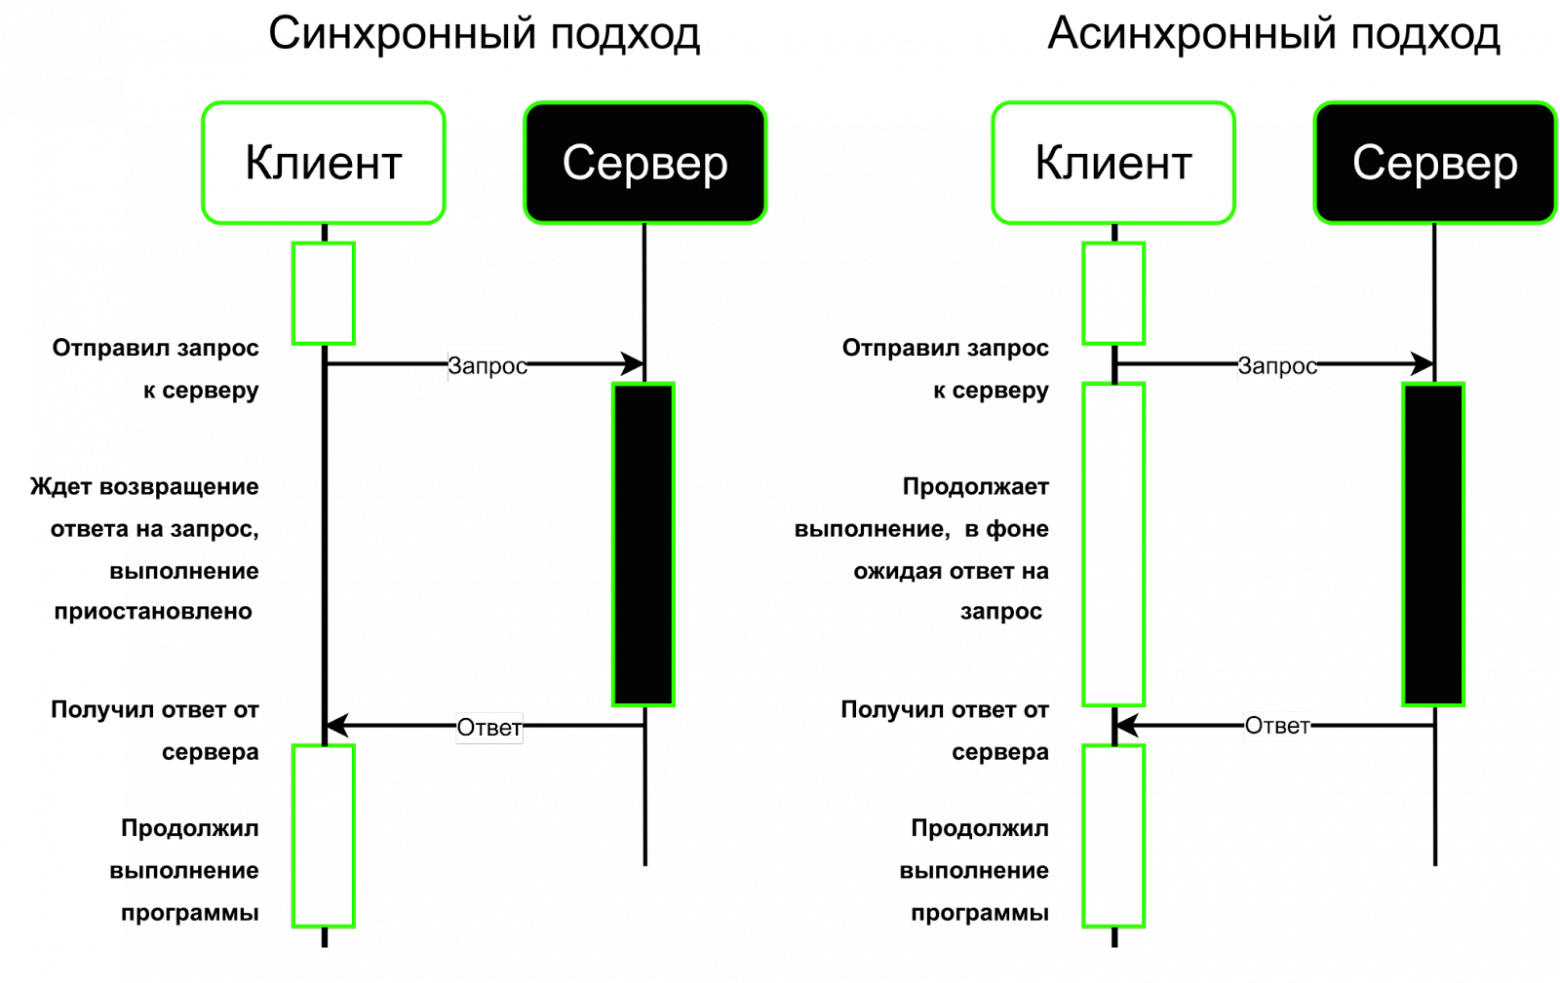

## Где используется АП?
Асинхронность больше всего подходит для таких сценариев:

1. Программа выполняется слишком долго.
2. Причина задержки — не вычисления, а ожидания ввода или вывода.
3. Задачи, которые включают несколько одновременных операций ввода и вывода.

   Это могут быть:
    - Парсеры (обработчики)
    - Сетевые сервисы (получение и отправка данных; прим.: телеграм-боты и веб-сайты)
    - Работа с данными (запросы в базы данных)
5. **Асинхронный подход не применим в задачах, которые сильно нагружают процессор, например, расчет или проверка чисел на простоту.** Здесь может спасти многопоточность.
#### Многопоточность != асинхронность

### Когда говорят об асинхронности, обычно используют три близких понятия. Это **конкурентность** (concurrency), **параллелизм** (parallel execution) и **многопоточность** (multithreading). Все они связаны с одновременным выполнением задач, однако, это не одно и то же.

#### **Конкурентность.**
Понятие конкурентного исполнения самое общее. Оно означает, что множество задач выполняются в одно время. Можно сказать, что в программе есть несколько логических потоков – по одному на каждую задачу. При этом потоки могут физически выполняться одновременно, но это не обязательно. Задачи при этом не должны быть связаны друг с другом, и не имеет значения, какая из них завершится раньше, а какая позже.

#### **Параллелизм.**
Параллельное исполнение используют для разделения одной задачи на части для ускорения вычислений. Например, нужно сделать цветное изображение черно-белым. Обработка верхней половины не отличается от обработки нижней. Следовательно, можно разделить эту задачу на две части и раздать их разным потокам, чтобы ускорить выполнение в два раза. Наличие двух физических потоков здесь принципиально важно, так как на компьютере с одним вычислительным устройством (процессорным ядром) такой прием провести невозможно.

#### **Многопоточность.**
Здесь поток является абстракцией, под которой может скрываться и отдельное ядро процессора, и **[поток ОС](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%82%D0%BE%D0%BA_%D0%B2%D1%8B%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F)**. Некоторые языки даже имеют собственные объекты потоков (например, Python). Таким образом, эта концепция может иметь принципиально разную реализацию.

#### **Асинхронность.**
Идея асинхронного выполнения заключается в том, что начало и конец одной операции происходят в разное время в разных частях кода. Чтобы получить результат, необходимо подождать, причем время ожидания непредсказуемо. Как правило, асинхронные задачи выполняются в одном потоке. Такой режим еще называют **"кооперативная однопоточная многозадачность".** Т.е. асинхронность - это частный случай конкурентности.

<div>
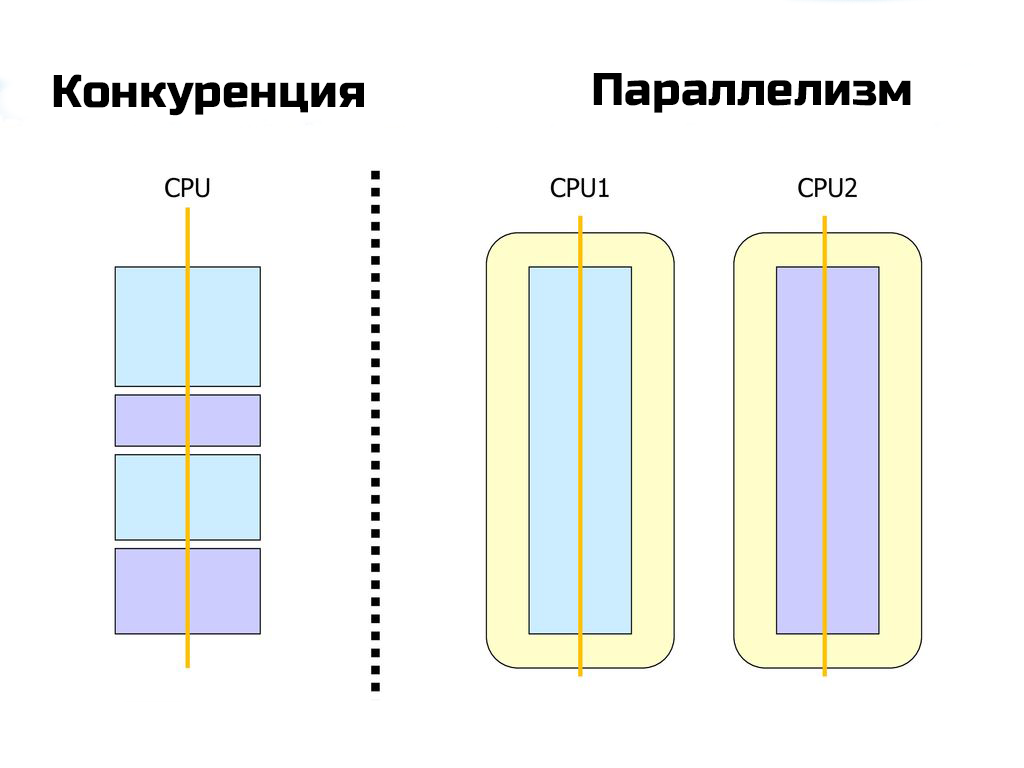
</div>

- При использовании многопоточности **операционная система знает о наличии различных потоков и может в любое время прерывать их работу и переключать на другую задачу. Сама программа это не контролирует.** Это — то, что называется «вытесняющей многозадачностью», так как операционная система может принудить поток выполнить переключение на другую задачу. В большинстве языков программирования потоки выполняются параллельно, но **в Python в каждый конкретный момент времени позволено выполняться лишь одному потоку**.

- При использовании модуля `asyncio` **программа сама принимает решение о том, когда ей нужно переключиться между задачами. Каждая задача взаимодействует с другими задачами, передавая им управление тогда, когда она к этому готова.** Поэтому такая схема работы называется «кооперативной многозадачностью», так как каждая задача должна взаимодействовать с другими, передавая им управление в момент, когда она уже не может сделать ничего полезного.



### Но в нашей бочке меда есть ложка дегтя. **GIL** (Global Interpreter Lock) – глобальная блокировка интерпретатора. Суть GIL заключается в том, что выполнять байт код может только один поток. Это нужно для того, чтобы упростить работу с памятью (на уровне интерпретатора) и сделать комфортной разработку модулей на языке C. 
### Все задачи можно разделить на 2 группы:
- те, что преимущественно используют процессор для своего выполнения, например, математические - CPU-bound
- и работающие с вводом выводом (диск, сеть и т.п.) - IO-bound.
**В CPython все стандартные библиотечные функций, которые выполняют блокирующий ввод-вывод, освобождают GIL**, это дает возможность поработать другим потокам, пока ожидается ответ от ОС.

<div>
<img src="https://www.pvsm.ru/images/2019/07/03/deistvitelno-li-Python-GIL-uje-mertv-4.png" width="900"/>
</div>

## Асинхронные функции

### Асинхронное программирование — выполнение программы в неблокирующем режиме системного вызова, что позволяет потоку программы продолжить работу.
Благодаря асинхронному программированию в одном процессе и даже потоке мы можем выполнять сразу множество задач.

### Представим ситуацию. Вы написали программу, которая время от времени запрашивает у API прогноза погоды, собственно, прогноз погоды. Но API этот медленный, поэтому ждете вы долго. А клиенты ждут!

<div>
<img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/598/9c4/536/5989c4536adbbd89b147300832920135.png" width="1100"/>
</div>

Получается что мы ждем и ждем. А в это время наша программа могла бы выполнить множество полезной работы. Но все дело в том, что мы знаем, в каких участках кода программа будет ждать! Ничего не напоминает? Похоже на кооперативную многозадачность, но только не на уровне операционной системы, а на уровне процесса.

<div>
<img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/730/a2d/dad/730a2ddad3fcddc5fc984280d86c0075.png" width="1100"/>
</div>

### Плюсы:
- Асинхронный код выглядит как синхронный.
- Нет проблем с общей памятью, и избавляемся от синхронизаций.
- Не нужно переключать контекст между задачами, что экономит ресурсы компьютера.

### Минусы:

- Чуть более сложный подход для понимания.

### В Python есть ряд библиотек, которые позволяют работать с асинхронностью:
- asyncio — основная библиотека для работы с асинхронным программированием.
- aiohttp — для асинхронной работы с запросами.
- aiofiles — для работы с файловой системой. (использовать не рекомендуется из-за некоторых причин)

У библиотек есть префикс aio (asynchronous input output, асинхронный ввод-вывод). Тут решается проблема ожидания.

### Где полезно, а где - бесполезно использование АП?

## Процессы

Процесс, в простейших терминах, — это выполняющаяся программа. Один или несколько потоков выполняются в контексте процесса. 
Их основная задача – изолировать программы друг от друга, чтобы одна не могла получить доступ к памяти другой.

В Python каждому процессу выделен свой интерпретатор. Когда мы запускаем несколько процессов из кода, то мы обнаруживаем такое же количество процессов в мониторинге системы.

Небольшой пример создания процессов:

In [9]:
from multiprocessing import Process
from datetime import datetime


def count_to_half_billion(n, st, end):
    def is_prime(num):
        for i in range(2, int(num ** 0.5 + 1)):
            if num % i == 0:
                return False
        return True

    cnt = 0
    start_ = datetime.now()
    for i in range(st, end):
        if is_prime(i):
            cnt += 1
    end_ = datetime.now()
    print(f'Process {n} is finished. Spent {(end_ - start_).total_seconds()} sec')
    print(cnt)


def main():
    p1 = Process(target=count_to_half_billion, args=(1, 2, 1000000), daemon=True)
    p2 = Process(target=count_to_half_billion, args=(2, 1000001, 2000000), daemon=True)
    p1.start()
    p2.start()
    p1.join()
    p2.join()
    # У нас есть основной (главный) процесс, который содержит весь код нашей программы, 
    # и два дополнительных (фоновых) p1, p2. Их мы создаем, когда мы прописываем параметр 
    # daemon=True. Так мы как раз и указываем, что эти два процесса будут второстепенными. 
    # Если мы не вызовем метод join у фонового процесса, то наша программа завершит свое 
    # выполнение, не дожидаясь выполнения p1 и p2.


def sync():
    def is_prime(num):
        for i in range(2, int(num ** 0.5 + 1)):
            if num % i == 0:
                return False
        return True
    cnt = 0
    start_ = datetime.now()
    for i in range(2, 2000000):
        if is_prime(i):
            cnt += 1
    end_ = datetime.now()
    print(f'Process 0 is finished. Spent {(end_ - start_).total_seconds()} sec')
    print(cnt)


if __name__ == '__main__':
    sync()
    main()


Process 0 is finished. Spent 5.97741 sec
148933


Traceback (most recent call last):
  File "<string>", line 1, in <module>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
  File "<string>", line 1, in <module>
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeE

<div>
<img src="http://onreader.mdl.ru/MasteringConcurrencyInPython/content/figures/Fig0602.jpg" width="600"/>
</div>

Несмотря на то, что у каждого процесса своя память, их можно связать с помощью очереди (Queue). **Процессы не видят внешние переменные. Все, что они используют, должно передавать в качестве аргументов!**

In [ ]:
from multiprocessing import Process, Queue
from datetime import datetime


def count_primes(n, st, end, q):
    def is_prime(num):
        for i in range(2, int(num ** 0.5 + 1)):
            if num % i == 0:
                return False
        return True

    cnt = 0
    start_ = datetime.now()
    for i in range(st, end):
        if is_prime(i):
            cnt += 1
    end_ = datetime.now()
    print(f'Process {n} is finished. Spent {(end_ - start_).total_seconds()} sec')
    q.put((n, cnt))


def main():
    q = Queue()
    p1 = Process(target=count_primes, args=(1, 2, 1000001, q), daemon=True)
    p2 = Process(target=count_primes, args=(2, 1000001, 2000001, q), daemon=True)
    p1.start()
    p2.start()
    p1.join()
    p2.join()
    while not q.empty():
        print(q.get())


def sync():
    def is_prime(num):
        for i in range(2, int(num ** 0.5 + 1)):
            if num % i == 0:
                return False
        return True
    cnt = 0
    start_ = datetime.now()
    for i in range(2, 2000000):
        if is_prime(i):
            cnt += 1
    end_ = datetime.now()
    print(f'Process {0} is finished. Spent {(end_ - start_).total_seconds()} sec')
    print(cnt)


if __name__ == '__main__':
    #sync()
    main()


## Потоки

Поток — это базовая единица, которой операционная система выделяет процессорное время. Поток может выполнять любую часть кода процесса, включая те части, которые в настоящее время выполняются другим потоком. Интерфейсы работы с процессами и потоками в Python очень похожи.

Потоки живут внутри процессов, потребляют меньше ресурсов и разделяют общую память внутри процесса. Во многих языках программирования потоки создавались именно для того, чтобы выполнять задачи параллельно, **но не в Python. А виноват в этом GIL.**

### **GIL** (Global Interpreter Lock) – глобальная блокировка интерпретатора. Суть GIL заключается в том, что выполнять байт код может только один поток. Это нужно для того, чтобы упростить работу с памятью (на уровне интерпретатора) и сделать комфортной разработку модулей на языке C. 
GIL в Python печально известна тем, что препятствует многопоточным программам достижения их полностью оптимальной скорости.
### Все задачи можно разделить на 2 группы:
- те, что преимущественно используют процессор для своего выполнения, например, математические - CPU-bound
- и работающие с вводом выводом (диск, сеть и т.п.) - IO-bound.
**В CPython все стандартные библиотечные функций, которые выполняют блокирующий ввод-вывод, освобождают GIL**, это дает возможность поработать другим потокам, пока ожидается ответ от ОС.

Небольшой пример создания процессов:

In [10]:
import threading
from datetime import datetime


def count_primes(n, st, end):
    def is_prime(num):
        for i in range(2, int(num ** 0.5 + 1)):
            if num % i == 0:
                return False
        return True

    cnt = 0
    start_ = datetime.now()
    for i in range(st, end):
        if is_prime(i):
            cnt += 1
    end_ = datetime.now()
    print(f'Thread {n} is finished. Spent {(end_ - start_).total_seconds()} sec')
    print(cnt)


if __name__ == '__main__':
    t1 = threading.Thread(target=count_primes, args=(1, 2, 1000001), daemon=True)
    t2 = threading.Thread(target=count_primes, args=(2, 1000001, 2000001), daemon=True)
    t1.start()
    t2.start()
    t1.join()
    t2.join()


Thread 1 is finished. Spent 4.125236 sec
78498
Thread 2 is finished. Spent 5.737202 sec
70435


### Первая проблема – Race Condition или состояние гонки.

<div>
<img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/1c9/7c9/bbe/1c97c9bbe6dc9eee3e74c842bd921e9b.png" width="1100"/>
</div>

<div>
<img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/b2b/44a/7fc/b2b44a7fc5d765d3440c38e5101b1979.png" width="1100"/>
</div>

Запускается программа -> Поток 1 начинает читает переменную x -> Переключаение контекста на поток 2 -> Поток 2 берет значение из x = 2, умножает на 2 и записывает в x = 4 -> Переключение контекста на поток 1 -> Сохраненное значение x = 2 увеливается на 1 и в глобальную переменную записывается 3 -> **Итог: 3**

#### Один поток обогнал другой при переключении контекста, и мы получили непредсказуемый результат. Такое событие и называется **Race condition**. Как тогда быть уверенным в том, что поток, взявший в работу какие-то данные, выполнит свою работу, перед тем как переключит свой контекст на другой поток?

In [15]:
from threading import Thread
from time import sleep

counter = 0


def increase(by, n):
    global counter

    local_counter = counter
    local_counter += by

    sleep(1)
    # Передаем ОС управлением над потоками

    counter = local_counter
    print(f'{n}. {counter=}')


t1 = Thread(target=increase, args=(10, 1))
t2 = Thread(target=increase, args=(20, 2))
t1.start()
t2.start()
t1.join()
t2.join()

2. counter=20
1. counter=10


Что же делать? Может, можно как-то заблокировать вызовы потоков?..

**Lock (замок)** – объект, который захватывает поток, и пока поток не освободит (release) Lock, другие потоки не смогут ничего сделать с этими данными, захваченными при помощи замка.

In [16]:
from threading import Thread, Lock
from time import sleep

counter = 0


def increase(by, lock: Lock):
    global counter

    lock.acquire()

    local_counter = counter
    local_counter += by

    sleep(1)

    counter = local_counter
    print(f'{counter=}')

    lock.release()


lock = Lock()
t1 = Thread(target=increase, args=(10, lock,))
t2 = Thread(target=increase, args=(20, lock,))
t1.start()
t2.start()
t1.join()
t2.join()

counter=10
counter=30


Когда блокировки потока нет, метод `Lock.acquire()` блокирует поток и все последующие вызовы `Lock.acquire()` в других потоках не запустятся (будут заблокированы). Поток блокируется до тех пор, пока вызов метода `Lock.release()` в потоке не изменит его на "unlocked".

Несмотря на то, что Lock помогает решить проблему с Race condition, он может привести к другой сложной ситуации, когда один поток ждет освобождение одного замка, а другой ждет освобождение от первого. Такое ожидание приводит к ситуации взаимного тупика - **Deadlock**.

In [17]:
from threading import Thread, Lock
from time import sleep

a = 5
b = 10

a_lock = Lock()
b_lock = Lock()


def function_a():
    global a
    global b

    a_lock.acquire()
    print('Функция a, a_lock = заблокирован')
    sleep(1)
    b_lock.acquire()
    print('Функция a, b_lock = заблокирован')

    sleep(1)

    a_lock.release()
    print('Функция a, a_lock = разблокирован')
    b_lock.release()
    print('Функция a, b_lock = разблокирован')


def function_b():
    global a
    global b

    b_lock.acquire()
    print('Функция b, b_lock = заблокирован')
    a_lock.acquire()
    print('Функция b, a_lock = заблокирован')

    sleep(1)

    b_lock.release()
    print('Функция b, b_lock = разблокирован')
    a_lock.release()
    print('Функция b, a_lock = разблокирован')


t1 = Thread(target=function_a)
t2 = Thread(target=function_b)

t1.start()
t2.start()

t1.join()
t2.join()


Функция a, a_lock = заблокированФункция b, b_lock = заблокирован



KeyboardInterrupt: 

### Программа зависает в ожидании разблокировки, которая никогда не произойдет. Также Deadlock произойдет при попытке заблокировать наш Lock повторно в том же потоке.

Решить проблему с Deadlock могут помочь различные механизмы синхронизации потоков. Один из них – **Semaphore (Семафор)**.

<div>
<img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/f3e/8dd/685/f3e8dd685990942bc4bed52863e5ba07.png" width="1100"/>
</div>

In [19]:
import datetime
from threading import Semaphore, Thread
from time import sleep

s = Semaphore(3)


def semaphore_func(payload: int):
    s.acquire()
    now = datetime.datetime.now().strftime('%H:%M:%S')
    print(f'{now=}, {payload=}')
    sleep(2)
    s.release()


threads = [Thread(target=semaphore_func, args=(i,)) for i in range(7)]
for t in threads:
    t.start()
for t in threads:
    t.join()

now='01:12:30', payload=0
now='01:12:30', payload=1
now='01:12:30', payload=2
now='01:12:32', payload=3
now='01:12:32', payload=4
now='01:12:32', payload=5
now='01:12:34', payload=6


### Функции выполнялись группами по 3 потока. Одновременно не может выполняться кусок кода с блокировкой через Semaphore больше, чем указан в инициализации класса Semaphore.

### Источники (там можно углубиться)
- "Введение в параллельное программирование" - http://onreader.mdl.ru/MasteringConcurrencyInPython/content/Ch01.html
- "Как устроен GIL" - https://habr.com/ru/articles/84629/
- "Параллельные вычисления в Python" - https://habr.com/ru/companies/wunderfund/articles/581994/
- "Процессы и потоки в Python" - https://habr.com/ru/companies/simbirsoft/articles/701020/
- "Потоки" - https://devpractice.ru/python-lesson-22-concurrency-part-1/#p3 | https://pythonru.com/uroki/potoki-i-mnogopotochnost-dlja-nachinajushhih
- "Введение в АП" - https://prairie-pendulum-7bf.notion.site/0c615b7247b141489ce30d53e8f05835
- "Где полезно АП, а где - нет" - https://habr.com/ru/companies/kts/articles/713084/
- Еще про GIL - https://tproger.ru/translations/global-interpreter-lock-guide
- Queue в процессах - https://docs-python.ru/standart-library/paket-multiprocessing-python/klass-queue-modulja-multiprocessing/
- Lock в потоках - https://docs-python.ru/standart-library/modul-threading-python/klass-lock-modulja-threading/